In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Loading the dataset into a pandas DataFrame

data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

data

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [4]:
# dropping NaN values

data.dropna(subset=['Price'], inplace = True)

In [5]:
# Displaying the first few rows of the dataset

data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [6]:
# Checking the number of rows and columns in the dataset

data.shape

(920, 8)

In [7]:
# Displaying information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    object 
 3   Price       920 non-null    float64
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 64.7+ KB


In [8]:
# Generating descriptive statistics for numerical columns

data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,920.000000,9.200000e+02,920.000000,920.00000,920.000000,920.000000
mean,462.625000,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,266.924298,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,1.000000,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,462.500000,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,693.250000,7.000000e+05,113.000000,4.00000,4.922337,52.377545
max,924.000000,5.950000e+06,623.000000,14.00000,5.029122,52.423805


In [9]:
# Checking for missing values in the dataset

data.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [10]:
# Checking for duplicate rows in the dataset

data.duplicated().sum()

0

In [11]:
data.columns

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [12]:
# making a copy of the data

pred_data = data.copy()

In [13]:
# Dropping unnecessary columns

pred_data.drop(["Unnamed: 0", "Address", "Zip"], axis = 1, inplace = True)

In [14]:
pred_data

,Price,Area,Room,Lon,Lat
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...
919,750000.0,117,1,4.927757,52.354173
920,350000.0,72,3,4.890612,52.414587
921,350000.0,51,3,4.856935,52.363256
922,599000.0,113,4,4.965731,52.375268


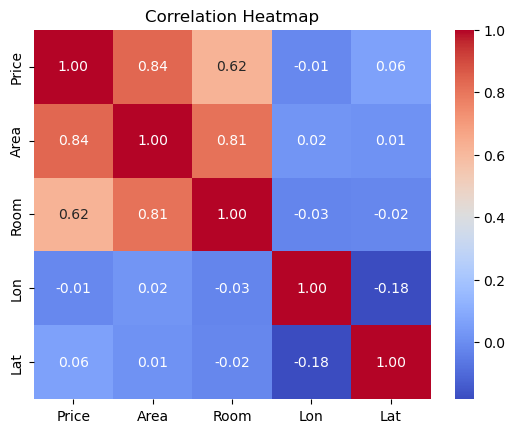

In [15]:
# Plotting a heatmap to visualize the correlation matrix of numerical features

sns.heatmap(pred_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Insight:

- Price and Area (0.84): There is a strong positive correlation. This suggests that properties with larger areas tend to have higher prices.

- Price and Room (0.62): There is a moderate positive correlation. This implies that properties with more rooms generally have higher prices.

- Area and Room (0.81): There is a strong positive correlation, meaning larger properties often have more rooms.

- Price, Lon, and Lat: These correlations are close to zero, indicating that the property price is not strongly influenced by location coordinates (longitude and latitude) in this dataset.

- The most influential variables for Price are Area and Room.


In [16]:
# defining the X (independent variable)

X = pred_data.drop(["Price"], axis = 1)

X

,Area,Room,Lon,Lat
0,64,3,4.907736,52.356157
1,60,3,4.850476,52.348586
2,109,4,4.944774,52.343782
3,128,6,4.789928,52.343712
4,138,5,4.902503,52.410538
...,...,...,...,...
919,117,1,4.927757,52.354173
920,72,3,4.890612,52.414587
921,51,3,4.856935,52.363256
922,113,4,4.965731,52.375268


In [17]:
# defining the y (target variable)

y = pred_data["Price"]


In [18]:
# Splitting the dataset into features (X) and target variable (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


## Baseline Model

In [19]:
# Create a baseline regression model using DummyRegressor
# mean will serve as our baseline prediction
baseline_model = DummyRegressor(strategy="mean")  

# Fit the baseline model to the training data
baseline_model.fit(X_train, y_train)


DummyRegressor()

In [22]:
# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Calculate metrics to evaluate the baseline model
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
r2 = r2_score(y_test, y_pred_baseline)

print("Baseline Model Metrics:", "\nMean Absolute Error (MAE):", mae,"\nMean Squared Error (MSE):", mse, "\nR² Score:", r2)

Baseline Model Metrics: 
Mean Absolute Error (MAE): 323895.2275519849 
Mean Squared Error (MSE): 304572087193.48145 
R² Score: -0.00022734623108422447


## Linear Regression Model

In [23]:
# Linear regression model
regressor = LinearRegression()

# Fit the linear regression model to the training data
regressor.fit(X_train, y_train)


LinearRegression()

In [28]:
# Getting the coefficients and intercept of the linear regression model
coefficients = regressor.coef_
intercept = regressor.intercept_

# Printing the coefficients and intercept
print("Coefficients:", coefficients, "\nIntercept:", intercept)

Coefficients: [   8880.15473346  -42457.77723685 -329073.63475711  730743.12857545] 
Intercept: -36729257.39557158


In [29]:
# Make predictions on the test set
y_predict = regressor.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print metrics
print("Linear Regression Metrics:", "\nMean Absolute Error (MAE):", mae,"\nMean Squared Error (MSE):", mse, "\nR² Score:", r2)


Linear Regression Metrics: 
Mean Absolute Error (MAE): 164755.88559390584 
Mean Squared Error (MSE): 60958225226.28508 
R² Score: 0.7998106641653246


## Insight: 

- The Linear Regression Model performs much better than the Baseline Model, with lower MAE and MSE, indicating reduced prediction errors. The high R² score (0.7998) shows the model explains most of the variance, confirming it is effective and well-suited for the data.

## Random Forest Regression 

In [30]:
# Random Forest Regressor 
rf = RandomForestRegressor (random_state = 42)

# Fit the linear regression model to the training data
rfModel = rf.fit(X_train, y_train)

In [31]:
# predicting with test data 
y_predict_rf = rfModel.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_predict_rf)
mse = mean_squared_error(y_test, y_predict_rf)
r2 = r2_score(y_test, y_predict_rf)

# Print metrics
print("Random Forest Metrics:", "\nMean Absolute Error (MAE):", mae,"\nMean Squared Error (MSE):", mse, "\nR² Score:", r2)


Random Forest Metrics: 
Mean Absolute Error (MAE): 101226.81407608696 
Mean Squared Error (MSE): 56156095915.1732 
R² Score: 0.8155810556722151


## Insight:

The Random Forest Regressor further improves performance compared to both the Baseline and Linear Regression Models. Its lower MAE and MSE indicate fewer errors, and the higher R² score shows that it explains over 81.5% of the variance in the target variable. This suggests the Random Forest model captures the data's patterns even better, making it the most effective model so far.
